In [13]:
from sklearn.datasets import make_multilabel_classification
# from bls2 import broadnet
import bls1,bls3
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from skmultilearn.dataset import load_dataset
from skmultilearn.dataset import available_data_sets
from sklearn.metrics import accuracy_score,hamming_loss,f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
set([x[0] for x in available_data_sets().keys()])

{'Corel5k',
 'bibtex',
 'birds',
 'delicious',
 'emotions',
 'enron',
 'genbase',
 'mediamill',
 'medical',
 'rcv1subset1',
 'rcv1subset2',
 'rcv1subset3',
 'rcv1subset4',
 'rcv1subset5',
 'scene',
 'tmc2007_500',
 'yeast'}

In [15]:
X_train, y_train, feature_names, label_names = load_dataset('yeast', 'train')
X_test, y_test, _, _ = load_dataset('yeast', 'test')
X=np.vstack([X_train.toarray(),X_test.toarray()])
y=np.vstack([y_train.toarray(),y_test.toarray()])

yeast:train - exists, not redownloading
yeast:test - exists, not redownloading


In [4]:
num=5

In [5]:
bls = bls1.broadnet(maptimes = 30,
               enhencetimes = 40,
               map_function = 'relu',
               enhence_function = 'sigmoid',
               batchsize = 100,
               reg = 0.001)
bls_2 = bls3.broadnet(maptimes = 30,
               enhencetimes = 40,
               map_function = 'relu',
               enhence_function = 'sigmoid',
               batchsize = 100,
               reg = 0.001)

In [6]:
accuracy=[]
hamming=[]
f1=[]
accuracy_2=[]
hamming_2=[]
f1_2=[]
for i in range(num):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    bls.fit(X_train,y_train)
    predition=bls.predict(X_test)
    accuracy.append(accuracy_score(y_pred=predition,y_true=y_test))
    hamming.append(hamming_loss(y_pred=predition,y_true=y_test))
    f1.append(f1_score(y_pred=predition,y_true=y_test,average='micro'))
    y_train[y_train==0]=-1
    bls_2.fit(X_train,y_train)
    predition=bls_2.predict(X_test)
    accuracy_2.append(accuracy_score(y_pred=predition,y_true=y_test))
    hamming_2.append(hamming_loss(y_pred=predition,y_true=y_test))
    f1_2.append(f1_score(y_pred=predition,y_true=y_test,average='micro'))


number of mapping nodes 3000, number of enhence nodes 4000
mapping nodes maxvalue 30.95675 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 3000, number of enhence nodes 4000
mapping nodes maxvalue 28.78655 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 3000, number of enhence nodes 4000
mapping nodes maxvalue 29.24473 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 3000, number of enhence nodes 4000
mapping nodes maxvalue 28.10814 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 3000, number of enhence nodes 4000
mapping nodes maxvalue 28.65846 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 3000, number of enhence nodes 4000
mapping nodes maxvalue 28.74486 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
number of mapping nodes 3000, number of enhence nodes 4000
mapping nodes maxvalue 28.38434 minvalue 0.0 
enhence nodes maxva

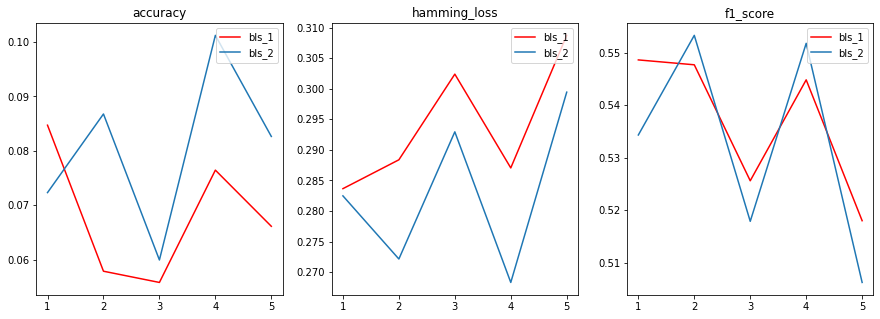

In [7]:
plt.figure(1,figsize=(15,5))
plt.subplot(1,3,1)
plt.title("accuracy")
plt.plot(range(1,num+1),accuracy,color='red',label='bls_1')
plt.plot(range(1,num+1),accuracy_2,label='bls_2')
plt.legend(loc='upper right')
plt.subplot(1,3,2)
plt.title("hamming_loss")
plt.plot(range(1,num+1),hamming,color='red',label='bls_1')
plt.plot(range(1,num+1),hamming_2,label='bls_2')
plt.legend(loc='upper right')
plt.subplot(1,3,3)
plt.title("f1_score")
plt.plot(range(1,num+1),f1,color='red',label='bls_1')
plt.plot(range(1,num+1),f1_2,label='bls_2')
plt.legend(loc='upper right')
plt.show()

In [8]:
y_train[y_train==0]=-1

In [9]:
bls_2.fit(X_train,y_train)
predition=bls_2.predict(X_test)
print(accuracy_score(y_pred=predition,y_true=y_test))
print(hamming_loss(y_pred=predition,y_true=y_test))
print(f1_score(y_pred=predition,y_true=y_test,average='micro'))

number of mapping nodes 3000, number of enhence nodes 4000
mapping nodes maxvalue 27.85438 minvalue 0.0 
enhence nodes maxvalue 1.0 minvalue 0.0 
0.07231404958677685
0.2814344746162928
0.5425761573518829


In [10]:
X.shape
X_train.shape

(1933, 103)

In [11]:
print(np.mean(accuracy))
print(np.mean(hamming))
print(np.mean(f1))

0.06818181818181819
0.2940377804014167
0.5369345645507033


In [12]:
print(np.mean(accuracy_2))
print(np.mean(hamming_2))
print(np.mean(f1_2))

0.08057851239669421
0.2830578512396694
0.5326869971734312
